In [1]:
import torch
print(torch.cuda.is_available())  # Should return True if CUDA is available
print(torch.version.cuda)         # Should print your CUDA version, e.g


True
12.1


In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import os
from pathlib import Path
import pandas as pd
import seaborn as sns
import torch
from torch_geometric.data import Data
from torch_geometric import utils
from environment_manager import *
name = "240318-initial parsing"
env = load_create_environment(name)
GHComponentTable.initialise()

Setting environment variables
Copying vanilla components
File copied successfully from C:\Users\jossi\Dropbox\Office_Work\Jos\GH_Graph_Learning\Grasshopper Components\240318-VanillaComponents\vanilla_components.csv to ExtractionEnvironments\240318-initial parsing\00-VanillaComponents\vanilla_components.csv.
Copying components
Copying gh files


In [8]:
graph_folder = r'C:\Users\jossi\Dropbox\Office_Work\Jos\GH_Graph_Learning\ExtractionEnvironments\240318-initial parsing\05-GraphML'
# Initialize an empty list to store dictionaries
data_list = []
graph_list = []
for file in os.listdir(graph_folder):
    if file.endswith('.graphml'):
        print(file)
        G = nx.read_graphml(os.path.join(graph_folder, file))
        # Skip files with no nodes to avoid division by zero
        if G.number_of_nodes() == 0:
            continue
        graph_list.append(G)

        avg_degree = sum(dict(G.degree()).values()) / G.number_of_nodes()
        dictions = {'file': file, 'nodes': G.number_of_nodes(), 'edges': G.number_of_edges(), 'avg_degree': avg_degree}
        
        # Append the dictionary to the list
        data_list.append(dictions)



00 - PROJECT TEXT.graphml
00.graphml
00915-CS-GH-LivePlanExport.graphml
00915-WE-GH-A-Corner Mullions.graphml
00915-WEA-XX-XX-GH-20-Columns - 160412.graphml
00915-WEA-XX-XX-GH-20-Revised Columns - 160412.graphml
00_sheared_cone_surface.graphml
00_simple_particles.graphml
00_TEMPLATE_BAKERY.graphml
01 Facade Area Takeoff.graphml
01 simple diffuse.graphml
01- TextTag.graphml
01.graphml
01533-HKUST-InnovationBuilding-BridgeNotWorking.graphml
01533-HKUST-InnovationBuilding-Manual Drawing.graphml
01533.graphml
01599_Sketch ModelsJS.graphml
01659-Orientations_updated.graphml
01_collisions.graphml
01_sheared_cone_panelization.graphml
02 - Text3d.graphml
02 many materials.graphml
02.graphml
02_fluids_a.graphml
03 simple referenced geometry.graphml
03-anim.graphml
03.graphml
03_fluids_b.graphml
04 - TextExplode.graphml
04 simple animation.graphml
04_fluids_archimedian_screw.graphml
05 simple bump maps.graphml
05_spring_constraints.graphml
06 simple parameter injector.graphml
06_spring_constrain

In [19]:
import os
import networkx as nx

graph_folder = r'C:\Users\jossi\Dropbox\Office_Work\Jos\GH_Graph_Learning\ExtractionEnvironments\240318-initial parsing\05-GraphML'
# Initialize an empty list to store dictionaries
data_list = []
graph_list = []

# Create a new graph to store the combined graph
combined_graph = nx.Graph()

for file in os.listdir(graph_folder):
    if file.endswith('.graphml'):
        print(file)
        G = nx.read_graphml(os.path.join(graph_folder, file))
        # Skip files with no nodes to avoid division by zero
        if G.number_of_nodes() == 0:
            continue
        graph_list.append(G)

        # Append the dictionary to the list
        data_list.append(dictions)

        # Add nodes and edges from the current graph to the combined graph
        combined_graph.add_nodes_from(G.nodes(data=True))
        combined_graph.add_edges_from(G.edges(data=True))

# Print the number of nodes and edges in the combined graph
print(f"Combined graph: {combined_graph.number_of_nodes()} nodes, {combined_graph.number_of_edges()} edges")

00 - PROJECT TEXT.graphml
00.graphml
00915-CS-GH-LivePlanExport.graphml
00915-WE-GH-A-Corner Mullions.graphml
00915-WEA-XX-XX-GH-20-Columns - 160412.graphml
00915-WEA-XX-XX-GH-20-Revised Columns - 160412.graphml
00_sheared_cone_surface.graphml
00_simple_particles.graphml
00_TEMPLATE_BAKERY.graphml
01 Facade Area Takeoff.graphml
01 simple diffuse.graphml
01- TextTag.graphml
01.graphml
01533-HKUST-InnovationBuilding-BridgeNotWorking.graphml
01533-HKUST-InnovationBuilding-Manual Drawing.graphml
01533.graphml
01599_Sketch ModelsJS.graphml
01659-Orientations_updated.graphml
01_collisions.graphml
01_sheared_cone_panelization.graphml
02 - Text3d.graphml
02 many materials.graphml
02.graphml
02_fluids_a.graphml
03 simple referenced geometry.graphml
03-anim.graphml
03.graphml
03_fluids_b.graphml
04 - TextExplode.graphml
04 simple animation.graphml
04_fluids_archimedian_screw.graphml
05 simple bump maps.graphml
05_spring_constraints.graphml
06 simple parameter injector.graphml
06_spring_constrain

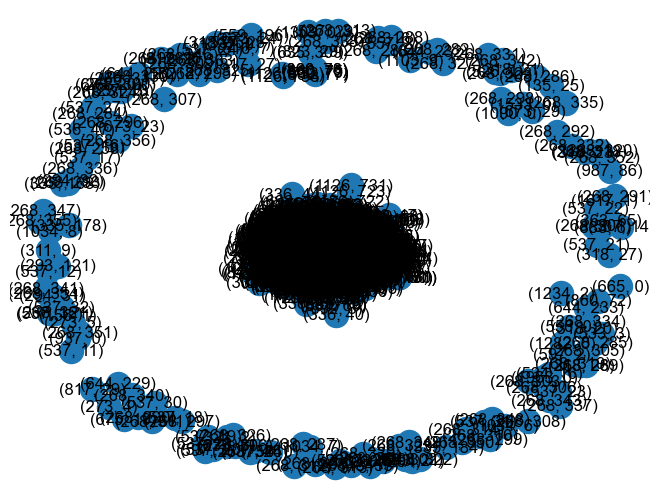

In [20]:
nx.draw(combined_graph, with_labels=True)

In [13]:
import System
# import Counter 
from collections import Counter
data = [utils.from_networkx(G) for G in graph_list]
guids = [v for d in data for v in d['guid']]
counter = Counter(guids)
tops = counter.most_common(1000)
names = []
categories = []
counts = []
for t, c in tops:
    name = GHComponentTable.search_component_by_guid(System.Guid(t)).Desc.Name
    names.append(name)
    category = GHComponentTable.search_component_by_guid(System.Guid(t)).Desc.Category
    categories.append(category)
    counts.append(c)
# components = [GHComponentTable.search_component_by_guid(System.Guid(g)) for g in guids]
# components

In [6]:
plot = False
if plot:
    # Set the font size globally
    plt.rcParams.update({'font.size': 5})  
    plt.figure(figsize=(10,200))
    
    x = counts
    y = [f"{categories[i]}:{name}" for i, name in enumerate(names)]
    sns.barplot(x=x, y=y)


In [18]:
edges = [data[i]['edge_index'] for i in range(len(data))]
edges

[tensor([[ 0,  1,  2,  3,  4,  4,  5,  5,  6,  6,  7,  8,  9,  9,  9, 10, 11, 12,
          12, 13, 15, 15, 15, 15, 16, 16, 18, 19, 24, 25, 26, 27, 28, 29, 29, 30,
          32, 32, 34, 36, 37, 38, 39, 40, 41, 44],
         [ 3,  0,  0,  4,  7, 16,  4, 11,  4, 13,  8, 10, 31, 32, 40,  9,  9, 11,
          13,  9, 31, 33, 35, 43, 18, 17, 17, 18, 23, 23,  8, 26, 26, 28, 30, 28,
          33, 35, 33, 35, 39, 43, 38, 38, 38, 43]]),
 tensor([[ 0,  1,  2,  3,  4,  4,  5,  5,  6,  6,  7,  8,  9,  9, 10, 11, 12, 12,
          13, 15, 15, 15, 16, 16, 18, 19, 24, 25, 26, 27, 28, 29, 29, 30, 32, 32,
          34, 36],
         [ 3,  0,  0,  4,  7, 16,  4, 11,  4, 13,  8, 10, 31, 32,  9,  9, 11, 13,
           9, 31, 33, 35, 18, 17, 17, 18, 23, 23,  8, 26, 26, 28, 30, 28, 33, 35,
          33, 35]]),
 tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 15, 16,
          17, 17, 18, 19, 20, 21, 22, 23, 23, 24, 25, 26, 27, 27, 28, 28, 29, 30,
          31, 31, 32, 33, 34, 36, 37